In [95]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels import *
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline  

In [54]:
#importing data
mat=pd.read_csv('student-mat.csv', index_col=0)
mat['class']= "M"
mat.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
school,,,,,,,,,,,,,,,,,,,,,
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,...,3,4,1,1,3,6,5,6,6,M
GP,F,17,U,GT3,T,1,1,at_home,other,course,...,3,3,1,1,3,4,5,5,6,M
GP,F,15,U,LE3,T,1,1,at_home,other,other,...,3,2,2,3,3,10,7,8,10,M
GP,F,15,U,GT3,T,4,2,health,services,home,...,2,2,1,1,5,2,15,14,15,M
GP,F,16,U,GT3,T,3,3,other,other,home,...,3,2,1,2,5,4,6,10,10,M


In [55]:
por=pd.read_csv('student-por.csv', index_col=0)
por["class"]= "P"
por.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
school,,,,,,,,,,,,,,,,,,,,,
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,...,3,4,1,1,3,4,0,11,11,P
GP,F,17,U,GT3,T,1,1,at_home,other,course,...,3,3,1,1,3,2,9,11,11,P
GP,F,15,U,LE3,T,1,1,at_home,other,other,...,3,2,2,3,3,6,12,13,12,P
GP,F,15,U,GT3,T,4,2,health,services,home,...,2,2,1,1,5,0,14,14,14,P
GP,F,16,U,GT3,T,3,3,other,other,home,...,3,2,1,2,5,0,11,13,13,P


Additional note: there are several (382) students that belong to both datasets . These students can be identified by searching for identical attributes that characterize each student, as shown in the annexed R file.

In [56]:
#concatinating por and mat dataframes---did NOT remove the students from both datasets

In [57]:
frames = [mat, por]

data = pd.concat(frames)

In [58]:
data

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
school,,,,,,,,,,,,,,,,,,,,,
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,...,3,4,1,1,3,6,5,6,6,M
GP,F,17,U,GT3,T,1,1,at_home,other,course,...,3,3,1,1,3,4,5,5,6,M
GP,F,15,U,LE3,T,1,1,at_home,other,other,...,3,2,2,3,3,10,7,8,10,M
GP,F,15,U,GT3,T,4,2,health,services,home,...,2,2,1,1,5,2,15,14,15,M
GP,F,16,U,GT3,T,3,3,other,other,home,...,3,2,1,2,5,4,6,10,10,M
GP,M,16,U,LE3,T,4,3,services,other,reputation,...,4,2,1,2,5,10,15,15,15,M
GP,M,16,U,LE3,T,2,2,other,other,home,...,4,4,1,1,3,0,12,12,11,M
GP,F,17,U,GT3,A,4,4,other,teacher,home,...,1,4,1,1,1,6,6,5,6,M
GP,M,15,U,LE3,A,3,2,services,other,home,...,2,2,1,1,1,0,16,18,19,M


In [59]:
cols=list(data)
cols

['sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'class']

In [60]:
cols.remove("absences")
cols.remove("G1")
cols.remove("G2")
cols.remove("G3")
cols.remove("class")
cols.remove('goout')
cols.remove('freetime')
cols.remove('famrel')
cols.remove('romantic')
cols.remove('Dalc')
cols.remove('Walc')
cols.remove('health')

In [61]:
cols

['sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet']

In [62]:
data.duplicated(cols).value_counts()

False    880
True     164
dtype: int64

In [63]:
#removing the 164 duplicates====NOTE: This was not the 382 duplicates that were expected
data.drop_duplicates(cols)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
school,,,,,,,,,,,,,,,,,,,,,
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,...,3,4,1,1,3,6,5,6,6,M
GP,F,17,U,GT3,T,1,1,at_home,other,course,...,3,3,1,1,3,4,5,5,6,M
GP,F,15,U,LE3,T,1,1,at_home,other,other,...,3,2,2,3,3,10,7,8,10,M
GP,F,15,U,GT3,T,4,2,health,services,home,...,2,2,1,1,5,2,15,14,15,M
GP,F,16,U,GT3,T,3,3,other,other,home,...,3,2,1,2,5,4,6,10,10,M
GP,M,16,U,LE3,T,4,3,services,other,reputation,...,4,2,1,2,5,10,15,15,15,M
GP,M,16,U,LE3,T,2,2,other,other,home,...,4,4,1,1,3,0,12,12,11,M
GP,F,17,U,GT3,A,4,4,other,teacher,home,...,1,4,1,1,1,6,6,5,6,M
GP,M,15,U,LE3,A,3,2,services,other,home,...,2,2,1,1,1,0,16,18,19,M


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, GP to MS
Data columns (total 33 columns):
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-null int64
Dalc          1044 non-null int64

In [65]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


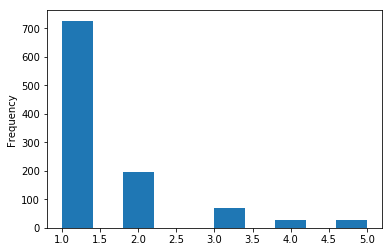

In [66]:
data.Dalc.plot.hist()

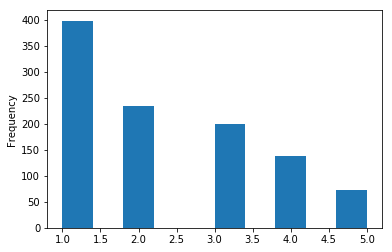

In [67]:
data.Walc.plot.hist()

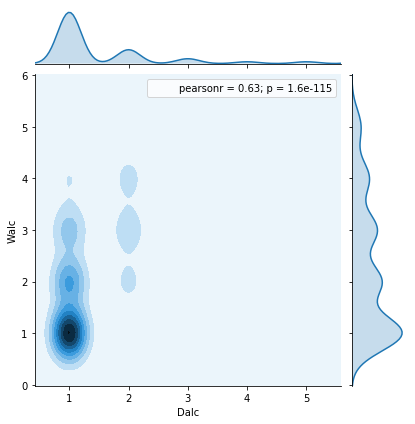

In [68]:
sns.jointplot(x= 'Dalc', y= 'Walc', data=data, kind='kde') 

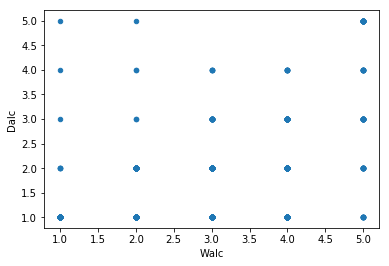

In [69]:
data.plot.scatter(y="Dalc", x="Walc")

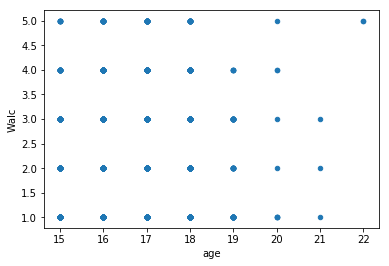

In [70]:
data.plot.scatter(y="Walc", x="age")

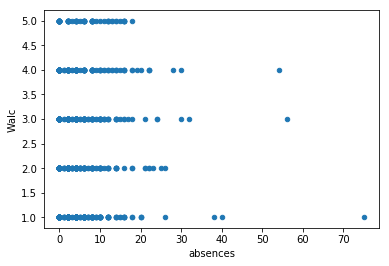

In [71]:
data.plot.scatter(y="Walc", x="absences")

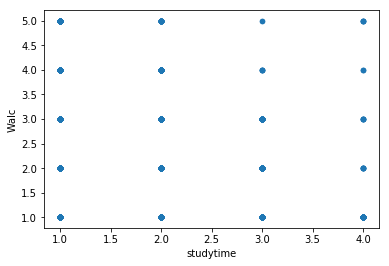

In [72]:
data.plot.scatter(y="Walc", x="studytime")

In [75]:
#Correlation matrix of all variables
corr=data.corr()
corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642


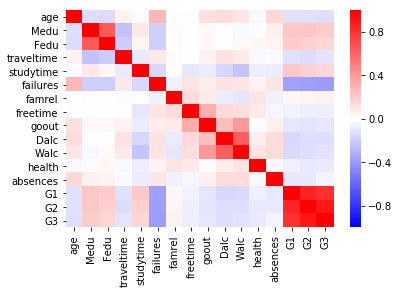

In [76]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1,
        vmax=1,
        center=0,
        cmap = matplotlib.cm.get_cmap('bwr'))

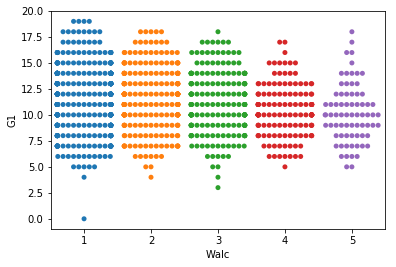

In [77]:
sns.swarmplot(x='Walc', y='G1', data=data) 

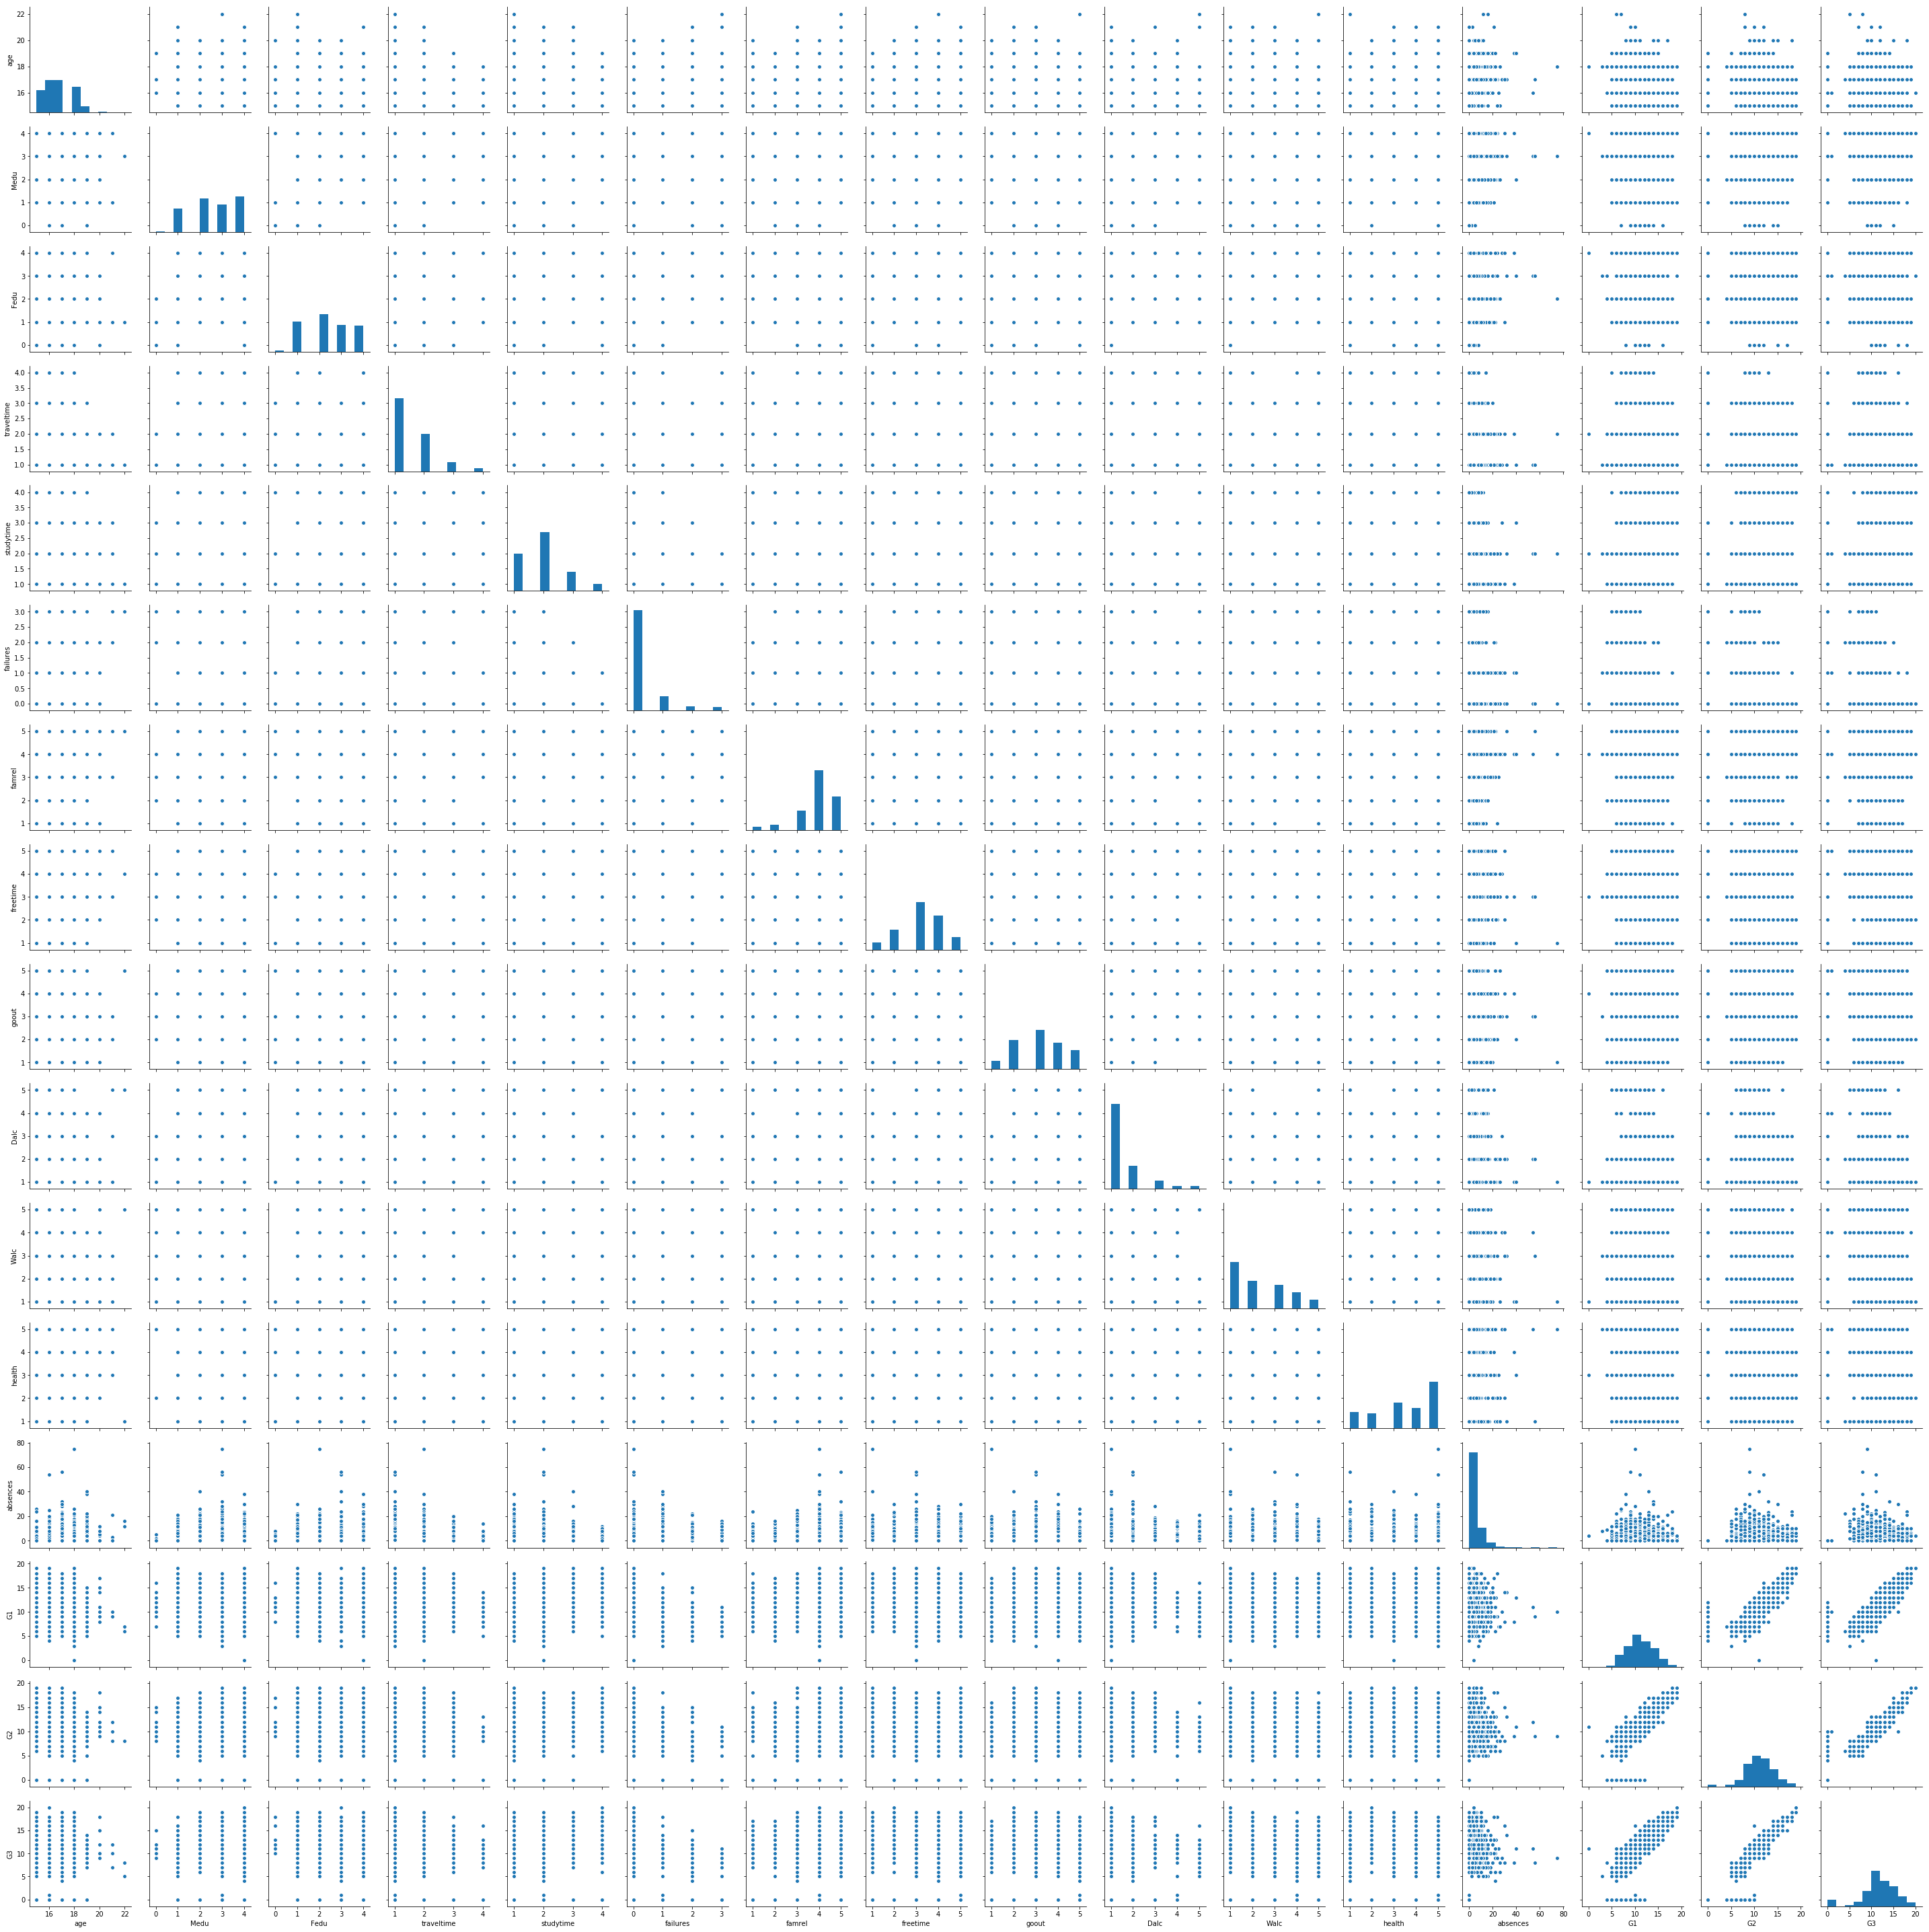

In [78]:
sns.pairplot(data)

In [79]:
#pearson r correlation between G1 and G2
stats.pearsonr(data["G1"], data["G2"])

(0.85873875251705478, 7.6499313944561367e-305)

In [80]:
#pearson r correlation between G1 and G3
stats.pearsonr(data["G1"], data["G3"])

(0.80914172054011735, 7.5563223997692958e-243)

In [81]:
#pearson r correlation between G2 and G3
stats.pearsonr(data["G3"], data["G2"])

(0.910743163058362, 0.0)

In [82]:
#pearson r correlation between Dalc and Walc
stats.pearsonr(data["Dalc"], data["Walc"])

(0.62781383799009727, 1.6090781593018178e-115)

In [83]:
#pearson r correlation between studytime and Walc
stats.pearsonr(data["studytime"], data["Walc"])

(-0.22907314839875173, 6.7542382632894366e-14)

In [84]:
#pearson r correlation between studytime and Dalc
stats.pearsonr(data["studytime"], data["Dalc"])

(-0.15966464126505259, 2.1480612248540985e-07)

In [85]:
#create dummy variables
data=pd.get_dummies(data)

In [86]:
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,class_M,class_P
school,,,,,,,,,,,,,,,,,,,,,
GP,18,4,4,2,2,0,4,3,4,1,...,0,1,0,1,1,0,1,0,1,0
GP,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,1,1,0,1,0
GP,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,0,1,1,0,1,0
GP,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,1,0
GP,16,3,3,1,2,0,4,3,2,1,...,0,1,0,1,1,0,1,0,1,0


### Machine Learning Using Linear Regression

In [127]:
#creating target and features
X=data.drop('Dalc', axis=1)
y=data['Dalc']

In [128]:
#creating the linear regression model
reg_all=linear_model.LinearRegression()

In [129]:
#fitting the linear regression
reg_all.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
#view the intercept
reg_all.intercept_

185235826460.30908

In [131]:
#view the feature coefficients
reg_all.coef_

array([  3.79559509e-02,   9.47539315e-02,  -5.81581046e-02,
         5.90859124e-02,   1.02843943e-02,  -1.17917363e-02,
        -2.84690617e-02,   5.89227666e-02,  -3.36089963e-03,
         4.08636207e-01,  -3.35347431e-03,   4.52352699e-03,
        -1.22972154e-02,   1.57866608e-02,  -1.28395802e-02,
        -3.79930693e+10,  -3.79930693e+10,   2.06563478e+10,
         2.06563478e+10,  -9.72326350e+09,  -9.72326350e+09,
        -8.85404005e+09,  -8.85404005e+09,  -2.10989496e+10,
        -2.10989496e+10,  -2.10989496e+10,  -2.10989496e+10,
        -2.10989496e+10,  -3.30403929e+09,  -3.30403929e+09,
        -3.30403930e+09,  -3.30403929e+09,  -3.30403929e+09,
         3.20858212e+10,   3.20858212e+10,   3.20858212e+10,
         3.20858212e+10,  -2.28248301e+10,  -2.28248301e+10,
        -2.28248301e+10,  -3.56911528e+10,  -3.56911528e+10,
        -2.91091368e+10,  -2.91091368e+10,   3.27761097e+05,
         3.27761165e+05,   2.78653203e+09,   2.78653203e+09,
        -2.89846508e+09,

In [123]:
feat=list(X)
feat_array=np.asarray(feat)
feat_array

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Walc', 'health', 'absences', 'G1',
       'G2', 'G3', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no', 'romantic_yes', 'class_M', 'class_P'],
      dtype='<U17')

In [126]:
#creating dataframe of edtimated coeficients
pd.DataFrame({'estimatedCoefficients': reg_all.coef_,
              'features':feat_array })

,estimatedCoefficients,features
0,3.795595e-02,age
1,9.475393e-02,Medu
2,-5.815810e-02,Fedu
3,5.908591e-02,traveltime
4,1.028439e-02,studytime
5,-1.179174e-02,failures
6,-2.846906e-02,famrel
7,5.892277e-02,freetime
8,-3.360900e-03,goout
9,4.086362e-01,Walc


In [125]:
#coefficient of determination(r-sqare value)
reg_all.score(X, y)

0.46374215321647488

### Cross-Validation

In [29]:
#splitting data into test and training sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=30)

In [36]:
#cross validation
cv_results=cross_val_score(reg_all, X_train, y_train, cv=5)
cv_results

array([ 0.47299405,  0.41788249,  0.39116755,  0.43390591,  0.3859375 ])

In [37]:
np.mean(cv_results)

0.42037749942544556

In [35]:
y_pred=reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.36684233565708213